# American Sign Language Hand Gesture Recognition
**Authors: Daniel Rey D. Cimafranca, Misha Ysabel K. Hwang, Nisarg Nigam**

<img src=amer_sign2.png>

## Executive Summary
American Sign Language (ASL) is one of the most widely used sign languages and is considered the lingua franca of the deaf community. ASL has its fundamental linguistic properties such as pronunciation rules, word formation, word order, etc., distinguishing itself from English. ASL does include fingerspelling for deaf individuals to convey proper nouns or English words for something. However, ASL individuals have limited English proficiency. Simultaneously, ASL individuals would rely on an ASL interpreter to perform essential tasks and express themselves comfortably. Using the ASL dataset from Kaggle, our team proposes to use deep learning and image processing techniques to recognize ASL fingerspelling alphabets. The model focused on recognizing static hand signs of the ASL alphabet. Thus, the letter “J,” K,” “Z” were excluded because both letters “J” and “Z” require motion, and the letter “K” is physically hard to replicate. The dataset goes through pre-processing. Afterward, we trained a CNN model with the pre-processed model. Then, we captured a live video using OpenCV and conducted image processing techniques (histogram manipulation and bilateral filtering. The resulting processed image converts to grayscale for prediction purposes. The precision, recall, and f1 score are 91.74%, 94.20%, and 92.45%. The ASL Sign Detection model can help ASL individuals communicate fingerspelling to the English hearing majority, but it would improve for a fully deployable prototype. Hence, future ASL detection models should consider strategies to detect ALS signs that have motion, expand to other native sign languages, improve real-time detection, and create a model to translate text/speech to ALS.

## Introduction
### Background
There is a common misconception that sign language is universal across all deaf communities. Different countries may not share the same sign language used. For example, British Sign Language differs from American Sign Language, so ASL users may not understand BSL users. Besides, the 2020 edition of Ethnologue reveals that there are about 144 sign languages worldwide. Certain countries may have more than one native sign language.

One of the most widely used sign languages is the American Sign Language (ASL). The ASL is a predominant sign language in the US and Anglophone Canada deaf communities. There are an estimated 250,000 to 500,000 American ASL users, with a portion of the users being children of deaf adults (coda). Similar to English, the international deaf community uses ASL as a lingua franca. Many individuals learn ASL as a second language. Moreover, reports have shown that certain parts of the world use ASL as a first language or other native sign languages such as Filipino Sign Language (FSL) are ASL-derived.

ASL is an entirely different language from English, containing fundamental linguistic properties such as pronunciation rules, word formation, and word order. ASL and English also differ in signaling functions. For example, English speakers raise their pitch to signal when they ask questions, while ASL users raise their eyebrows, widen their eyes, or tilt their bodies forward to signal when they ask questions.

ASL also includes Fingerspelling for deaf individuals to spell out English words. Each English alphabet corresponds to a distinct hand gesture in ASL Fingerspelling Alphabet. Typically, ASL individuals use Fingerspelling to convey proper names or English word for something.

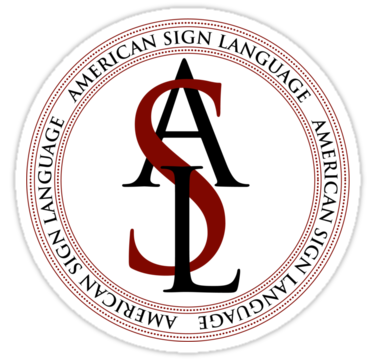

### Problem Statement
Despite ASL being the lingua franca of the deaf community, most of the world cannot understand and sign ASL. ASL users have to rely heavily on an interpreter when performing daily activities. Without an interpreter, they are at a disadvantage with employment opportunities, emergencies, or privacy issues.

Other people may argue that the mere usage of writing should solve the communication barrier. However, ASL users have limited English Proficiency because ASL does not have a complete written equivalent. Thus, there is a need to bridge the English hearing majority with ASL users.	


### Significance of the Study
Our team proposes to use deep learning and image processing techniques to recognize ASL hand gestures. This proposed model will help hundreds of thousands of ASL users perform individual tasks with better privacy and break the communication barrier to the hearing majority.

### Scope and Limitations
The model focused on recognizing static hand signs of the ASL alphabet. Thus, the letter “J”, “Z” were excluded because both letters “J” and “Z” require motion. For the real-time detection, the letter “K” was physically hard to replicate and therefore excluded as well.  The model may also favor fairer skin tones because the hand and finger details are more distinct when converting the hand (of fairer skin tone people) images to grayscale. Lastly, the model may not detect the ASL signs if both the hand and background are of a similar hue.


## Data Description
The sign language MNIST dataset available in Kaggle is patterned after the classic Modified National Institute of Standards and Technology (MNIST) dataset of handwritten digits.  The image data represents multiple users repeating gestures against different backgrounds cropped to show hands-only stored, with the image data flattened for storage as rows in a CSV file.  Each row represents a 28x28 pixel grayscale image of each alphabetic letter excluding J and Z, which require motion gestures.  All in all, there are 27,455 images as training data and 7,172 images as test data.

The dataset has the following features:
- `label`: the tagged alphabet in numbers where 1 is A, 2 is B, etc.
- `pixel*`: the brightness of the image in the specific pixel number

## Methodology

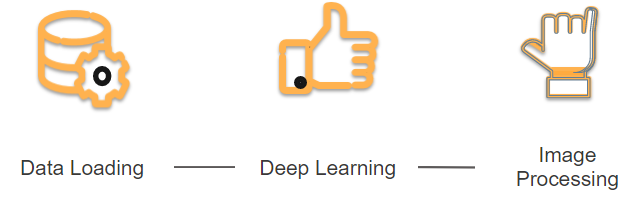

### Loading the Data
First, we loaded the standard libraries and the csv file into a pandas dataframe. We separated the features and target variable. 
Afterwards, we used the minmax Scaler for data scaling and reshaped the array in preparation for the machine learning model.

In [1]:
from skimage.io import imread, imshow
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('sign_mnist_train.csv')
df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


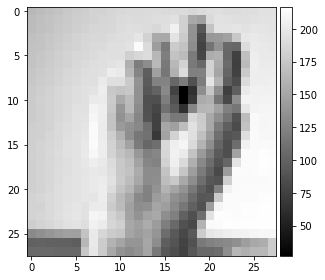

In [3]:
imshow(np.resize(df.iloc[4, 1:].to_numpy(), (28,28)), cmap='gray');

Since the labels are in numbers, they need to be converted to their alphabet counterpart.

In [4]:
from string import ascii_lowercase

alpha_dict = {idx:letter for idx, letter in enumerate(ascii_lowercase.replace("j", "").replace("z", ""))}

In [5]:
targets = pd.get_dummies(df.label).values #df.label.values
data = df.drop(columns='label').values

In [6]:
input_shape = (28,28, 1)

from sklearn.preprocessing import minmax_scale
data = minmax_scale(data)
data = np.reshape(data,(-1, 28, 28,1))

### Convolutional Neural Network
We split the data to 80% training data and 20% test data. With the training data, we trained a Convolutional Neural Network (CNN). The architecture has a convolution layer, max pooling layer, flatten layer, dense layer, and dropout layer. And, the final output has a shape of 24 because we are predicting how likely the hand gesture is one of the 24 letters. For the results, we just get the maximum of the prediction.

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, targets , test_size=0.2, random_state=0)

In [8]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [9]:
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(targets.shape[1],activation=tf.nn.softmax))

In [10]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=20)

Epoch 1/10
1099/1099 [==============================] - 23s 10ms/step - loss: 2.1130 - accuracy: 0.3770
Epoch 2/10
1099/1099 [==============================] - 11s 10ms/step - loss: 0.0743 - accuracy: 0.9849
Epoch 3/10
1099/1099 [==============================] - 12s 10ms/step - loss: 0.0197 - accuracy: 0.9973
Epoch 4/10
1099/1099 [==============================] - 11s 10ms/step - loss: 0.0154 - accuracy: 0.9968
Epoch 5/10
1099/1099 [==============================] - 13s 12ms/step - loss: 0.0078 - accuracy: 0.9981
Epoch 6/10
1099/1099 [==============================] - 12s 11ms/step - loss: 0.0065 - accuracy: 0.9989
Epoch 7/10
1099/1099 [==============================] - 13s 12ms/step - loss: 0.0120 - accuracy: 0.9970
Epoch 8/10
1099/1099 [==============================] - 12s 11ms/step - loss: 0.0074 - accuracy: 0.9975
Epoch 9/10
1099/1099 [==============================] - 11s 10ms/step - loss: 0.0051 - accuracy: 0.9986
Epoch 10/10
1099/1099 [==============================] - 11s 10m

In [11]:
model.save('my_model')
model = tf.keras.models.load_model('my_model')

In [12]:
loss, accuracy = model.evaluate(X_test, y_test)

172/172 [==============================] - 2s 4ms/step - loss: 4.0893e-04 - accuracy: 1.0000


In [13]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis =1)
y_test = np.argmax(y_test, axis =1)

In [14]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

1.0


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4732)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               605824    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 24)                3096      
Total params: 609,200
Trainable params: 609,200
Non-trainable params: 0
__________________________________________________

### Video Testing
We then retrofitted the model for real-time detection of hand signs.  Initially it was observed that the model was sensitive to light conditions, slight movements of the hand across frames, delay in predictions, and the presence of other objects in the background.  The captured frame was then enhanced with image processing to match the training dataset and therefore, improve its detection accuracy. The code for video capture prior to enhancement with image processing is shown below.

The OpenCV library was used for the video capture.

In [2]:
from skimage.color import rgb2gray, rgb2hsv
import cv2

In [17]:
video_capture = cv2.VideoCapture(0)

while True:

    ret, frame = video_capture.read()

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything is done, release the capture
video_capture.release()
cv2.destroyAllWindows()

### Image Processing
Here we see sample capture from video with no image preprocessing.  First step is of course to isolate the hand. 

In [10]:
# cv2.imwrite('frame.jpg', frame)
frame = cv2.imread('frame.jpg')

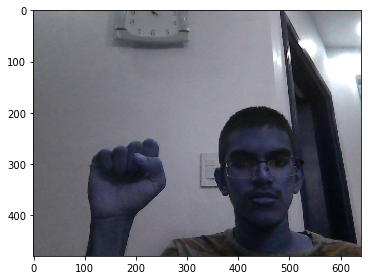

In [11]:
imshow(frame);

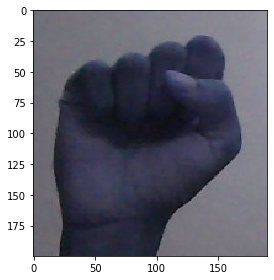

In [12]:
roi_raw=frame[230:430, 90:280]
imshow(roi_raw);

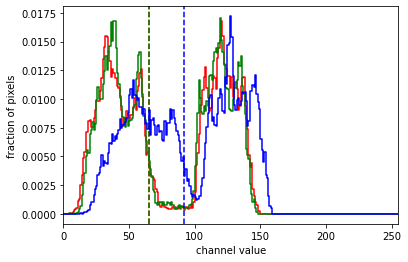

In [13]:
import matplotlib.pyplot as plt

for channel, color in enumerate('rgb'):
#     print(channel)
    channel_values = roi_raw[:,:,channel]
    plt.step(np.arange(256), 
             np.bincount(channel_values.flatten(), minlength=256)*1.0/
                         channel_values.size, 
             c=color)
    plt.xlim(0, 255)
    plt.axvline(np.percentile(channel_values, 50), ls='--', c=color)
plt.xlabel('channel value')
plt.ylabel('fraction of pixels');

We apply a Bilateral Filter, which is like Gaussian Blur, on the image patch in order to remove the noise surrounding the hand and to smoothen the image.  Second step, included in code below, is to do histogram manipulation to lighten the image and remove the blue tint. 

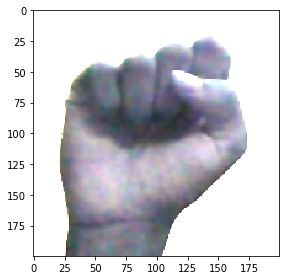

In [14]:
from skimage import img_as_ubyte

roi=frame[230:430, 85:285]
roi = cv2.bilateralFilter(roi, 5, 50, 100)
roi = img_as_ubyte((roi*1.0 / np.percentile(roi, 50, axis=(0, 1)))
                          .clip(0, 1))
imshow(roi);

Third, we convert the image patch to grayscale like the rest of the images in the Sign Language MNIST dataset. 

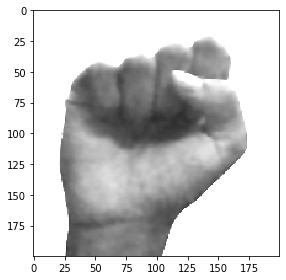

In [15]:
roi = rgb2gray(roi)
imshow(roi);

Finally, we resize the image to 28x28 pixel image.  At this point the image is ready for prediction. It is observed that pixelation at 28x28 resolution resulted in loss of definition between fingers.

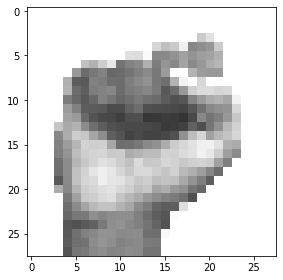

In [29]:
pic = cv2.resize(roi, dsize=(28, 28), interpolation=cv2.INTER_CUBIC)
pic = img_as_ubyte((pic*1.0 / np.percentile(pic, 50, axis=(0, 1)))
                          .clip(0, 1))

imshow(pic, cmap='gray');

# letter = alpha_dict[np.argmax(model.predict(np.reshape(pic,(-1, 28, 28,1))))]
# print('Prediction =', letter)

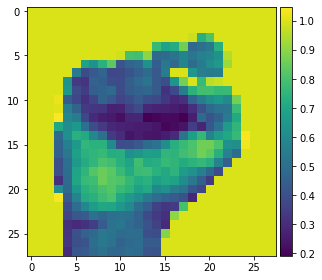

In [20]:
imshow(pic)

For the purpose of providing immediate visual feedback on the prediction made by the model, a rectangular box was overlayed on the video with prediction shown in the bottom right corner.

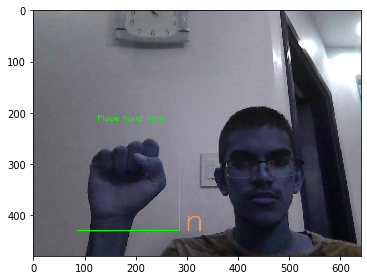

In [25]:
cv2.rectangle(frame,(85,230),(285,430),(0,255,0),0)
cv2.putText(frame,'Place hand here',(125,215), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 1, cv2.LINE_AA)

color = np.random.randint(0, 255, [1, 3])[0, :].tolist()
cv2.putText(frame, letter, (295,430), cv2.FONT_HERSHEY_SIMPLEX, 2, color, 2, cv2.LINE_AA)
imshow(frame);

### Live Testing
We then tested the real-time accuracy of the model after conducting necessary image processing.

In [26]:
video_capture = cv2.VideoCapture(0)

# # Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi',fourcc, 20.0, (640,480))

frames = []

while True:
    ret, frame = video_capture.read()
    
    roi=frame[230:430, 85:285]
    roi = cv2.bilateralFilter(roi, 5, 50, 100)
    roi = img_as_ubyte((roi*1.0 / np.percentile(roi, 50, axis=(0, 1)))
                              .clip(0, 1))
    roi = rgb2gray(roi)
    
    cv2.rectangle(frame,(85,230),(285,430),(0,255,0),0)
    cv2.putText(frame,'Place hand here',(125,215), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 1, cv2.LINE_AA)
    
    pic = cv2.resize(roi, dsize=(28, 28), interpolation=cv2.INTER_CUBIC)
    letter = alpha_dict[np.argmax(model.predict(np.reshape(pic,(-1, 28, 28,1))))]  
    
    # Capture frames for new test
    if cv2.waitKey(1) & 0xFF == ord('c'):
        l = [frame, pic, letter]
        frames.append(l)
    
    # Draw box and name
    color = np.random.randint(0, 255, [1, 3])[0, :].tolist()
    cv2.putText(frame, letter, (295,430), cv2.FONT_HERSHEY_SIMPLEX, 2, color, 2, cv2.LINE_AA)
    
    out.write(frame)
    
    # Display the resulting frame
    cv2.imshow('Video', frame)
    
    # End capture
    if cv2.waitKey(1) & 0xFF == ord('1'):
        break

# When everything is done, release the capture
video_capture.release()
out.write(frame)
cv2.destroyAllWindows()

In [27]:
# k was not collected since it's sign is very hard to replicate
truth = ['a', 'a', 'a', 'b', 'b', 'b', 'c', 'c', 'c', 'd', 'd', 'd', 'e',
       'e', 'e', 'f', 'f', 'f', 'g', 'g', 'g', 'h', 'h', 'h', 'i', 'i',
       'i', 'l', 'l', 'l', 'm', 'm', 'm', 'n', 'n', 'n', 'o', 'o', 'o',
       'p', 'p', 'p', 'q', 'q', 'q', 'r', 'r', 'r', 's', 's', 's', 't',
       't', 't', 'u', 'u', 'u', 'v', 'v', 'v', 'w', 'w', 'w', 'x', 'x',
       'x', 'y', 'y', 'y']

In [28]:
df2 = pd.DataFrame(frames)
df2.columns = ['frame', 'hand', 'prediction']
df2['truth'] = truth

df2.to_csv('new_test.csv', index=False)

In [29]:
import re
from ast import literal_eval

df2 = pd.read_csv('new_test.csv', usecols=['hand', 'prediction', 'truth']) # The frame column was accidentally lost when saving to csv
df2.hand = df2.hand.apply(lambda x: literal_eval(re.sub("\\[,", "[", re.sub("\s+", ",", x.strip()))))

print(df2.shape)
df2.head()

(69, 3)


,hand,prediction,truth
0,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",a,a
1,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",a,a
2,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",a,a
3,"[[0.99971248, 0.99876287, 1.0, 0.99401313, 1.0...",b,b
4,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",b,b


Hand signs captured during live testing were as follows.

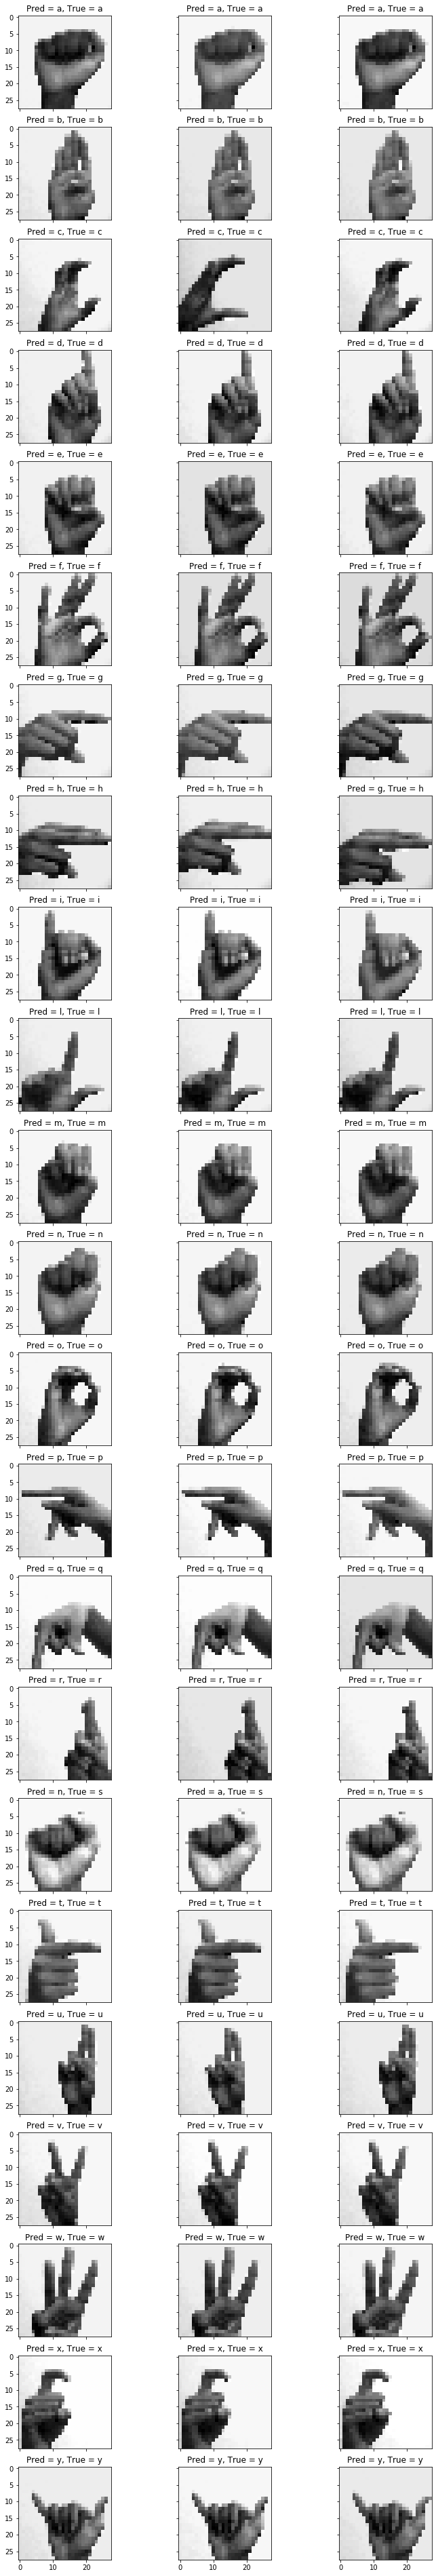

In [31]:
fig, ax = plt.subplots(len(df2.truth.unique()), 3, figsize=(12, len(df2)), sharex=True, sharey=True)

for row, letter in enumerate(df2.truth.unique()):
    df3 = df2[df2.truth==letter][['hand', 'prediction']].reset_index(drop=True)
    for col in range(3):
        ax[row, col].imshow(df3['hand'][col], cmap='gray')
        ax[row, col].set_title(f"Pred = {df3['prediction'][col]}, True = {letter}")

## Results and Discussion
The precision_recall_fscore_support function in sklearn.metrics was then used to calculate the precision, recall, and F1 score of the test results.  parameter for averaging method was set to `macro`, which calculates metrics for each label, and finds their unweighted mean.  This method does not take label imbalance into account, although there is none.

In [34]:
from sklearn.metrics import precision_recall_fscore_support

p, r, f1, s = precision_recall_fscore_support(df2.truth, df2.prediction, average='macro')
print('Precision', p)
print('Recall', r)
print('f1 score', f1)

Precision 0.9173913043478261
Recall 0.9420289855072462
f1 score 0.9245341614906833


Matrix below is a visual representation of results of the test, with values along the diagonal corresponding to successful predictions of test hand signs.  It was observed that model even after enhancement still had difficulty detecting H and S.

In the case of H, one out of the three tests were misclassified as G, which is likely due to H and G being different by the presence of just one additional finger.  While in the case of S, all tests were misclassified as either A or N.  This is due to the minimal difference between hand signs for A, N and S, which is a closed fist and relies heavily on position of thumb along with minute adjustments to position of other fingers to differentiate.  The need for better detection of these minute differences in finger position implies that the 28x28 pixel resolution is too low.

As observed prior to image processing enhancement, when applied to live capture the model is sensitive to light-angle position, and proximity of the camera.  Since we are not trained in ASL and our hands are not accustomed to the various positioning of the fingers, the misclassifications may have been from improperly done or improperly positioned hand signs.  At 92.45% F1-score, there is still room for improvement in the model.

Furthermore, this slight change in angle and light, and the slight delay in processing the image and predicting the letter, makes the model seem very sensitive.

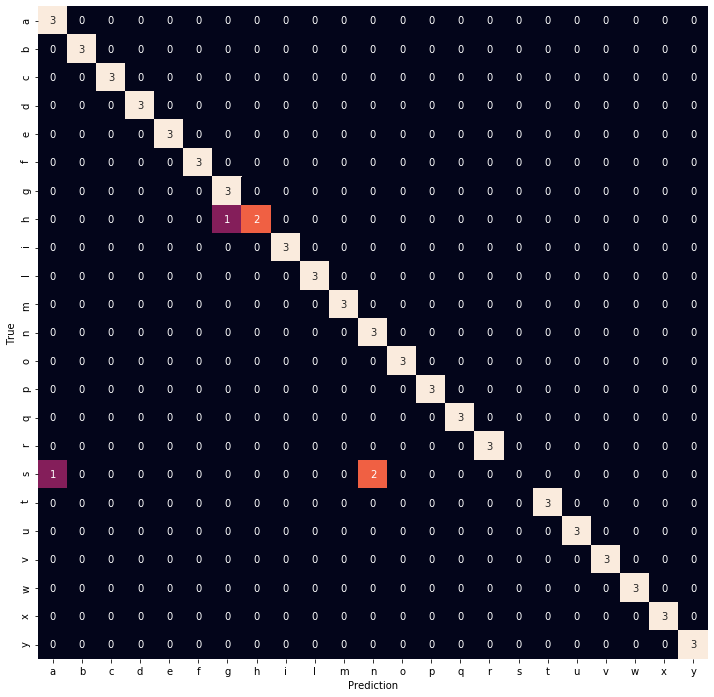

In [37]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

array = confusion_matrix(df2.truth, df2.prediction)
df_cm = pd.DataFrame(array, index = [i for i in 'abcdefghilmnopqrstuvwxy'],
                  columns = [i for i in 'abcdefghilmnopqrstuvwxy'])
plt.figure(figsize = (12,12))
sns.heatmap(df_cm, annot=True, cbar=False)
plt.ylabel('True')
plt.xlabel('Prediction');

A short video captured previously can be viewed below. If both cells do not work, please open the file with other media playing software.

In [38]:
cap = cv2.VideoCapture('output.avi')
# Check if camera opened successfully
if (cap.isOpened()== False): 
    print("Error opening video stream or file")

# Read until video is completed
while(cap.isOpened()):
    # Capture frame-by-frame
    ret, frame = cap.read()
    if ret == True:
        cv2.imshow('Frame',frame)
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break
    else:
        break

cap.release()
cv2.destroyAllWindows()

In [39]:
from IPython.display import Video
# Video is also available in the file if it does not work here.
Video("output.avi", embed=True)

## Conclusion
The ASL Sign Detection model can help ASL individuals communicate fingerspelling to the English hearing majority. Moreover, the model also allows ASL individuals to fingerspell at their comfortable space while allowing English speakers to understand fingerspelling with less struggle. However, the ASL Sign Detection model needs to expand its supported vocabulary and other native sign languages for a fully deployable prototype.

## Recommendation
Future ALS data science could consider the following recommendation:
1. Sign language dataset at higher pixel resolutions to better detect the small differences in similar hand signs, e.g. A, N, and S.
2. Develop a strategy for training models to detect ALS signs with gesture motions, expanding supported vocabulary.
3. Expand the data to other native sign languages when training the model so that there is the inclusivity of deaf communities in other countries.
4. Improve real-time detection of hand signs because the model was sensitive to shadows and jitter.
5. Consider creating a model that can translate speech/text to ALS. The idea would be to use English speech or text as an input to the model. Then, the model output is an animation of the ALS sign for ALS individuals to watch.


## References
Dyslexia Reading Well (n.d). The 44 Phonemes in English. Dyslexia Reading Well. Retrieved from https://www.dyslexia-reading-well.com/44-phonemes-in-english.html.

Eberhard, D.., Gary F. Simons, and Charles D. Fennig (eds.). 2020. Ethnologue: Languages of the World. Twenty-third edition. Dallas, Texas: SIL International. Online version: http://www.ethnologue.com. 

Language People (n.d.). Limited English Proficiency among the Deaf and Hard of Hearing Population: A Consideration for Care. Language People. Retrieved from https://www.languagepeople.com/limited-english-proficiency-among-the-deaf-and-hard-of-hearing-population-a-consideration-for-care/.

National Institute on Deafness and Other Communication Disorders (n.d.). American Sign Language. NIDCD. Retrieved from https://www.nidcd.nih.gov/health/american-sign-language.

Zhang, M. (2019). New technology breaks through sign language barriers. MSU Today. Retrieved from https://msutoday.msu.edu/news/2019/new-technology-breaks-through-sign-language-barriers/.
